# <span style="color:rgb(160,0,86)">Modelle für zufällige Ereignisse mit Python</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie wissen was eine **Zufallsvariable** ist und verstehen den Unterschied zwischen der **Wahrscheinlichkeitsverteilung** und der Häufigkeitsverteilung.
- Sie kennen das Python Module *scipy*.
- Sie können den **Erwartungswert** und die **Standardabweichung** einer Zufallsvariablen mit Python berechnen.
- Sie können mit Hilfe der kumulativen Wahrscheinlichkeitsverteilung mit Python **Wahrscheinlichkeiten** berechnen.  
- Sie kennen die wichtigsten **diskreten** und **stetigen** Verteilungen.  

***

### <span style="color:rgb(160,0,86)">Warum brauchen wir in der Statistik mathematische Modell für Zufall?</span>

**Daten** und **Zufallsprozesse** sind eng miteinander verbunden, weil Daten oft als Beobachtungen von zufälligen Vorgängen betrachtet werden.    
- Ein **Zufallsvariable** $X$ beschreibt die möglichen Werte eines Zufallsexperiments (z.B. die Körpergrösse einer zufällig gewählten Person). Wenn wir Messungen durchführen, erhalten wir konkrete Werte $x$, die als Realisierungen der Zufallsvariable $X$ gelten.
- Die zugrunde liegende **Wahrscheinlichkeitsverteilung** einer Zufallsvariablen hilft, die Struktur der Daten zu verstehen. Statistische Modelle nutzen diese Verteilungen, um Vorhersagen oder Schlussfolgerungen zu ermöglichen.
- Aus Stichprobendaten werden Parameter geschätzt, um Rückschlüsse auf die zugrunde liegende Zufallsvariable und deren Verteilung zu ziehen.

Zusammenfassend sind **Zufallsvariablen** mathematische **Modelle** für die Prozesse, die **Daten erzeugen**. Daten wiederum liefern beobachtbare Werte, die helfen, die zugrunde liegenden Wahrscheinlichkeitsverteilungen zu verstehen und in der Statistik zu nutzen.

#### <span style="color:rgb(160,0,86)">Beispiele:</span>

Wenn wir **mehrmals einen Würfel werfen**, erzeugen wir Daten. Wir können zählen, wie oft jede Zahl erscheint und die relative Häufigkeit für jede Zahl bestimmen:


In [127]:
import numpy as np

[np.random.randint(1,7) for _ in range(20)]

[2, 2, 2, 6, 1, 3, 2, 5, 3, 3, 1, 4, 5, 3, 2, 3, 2, 3, 4, 2]

In [129]:
anzWürfe = 1000000
würfe = np.array([np.random.randint(1,7) for _ in range(anzWürfe)])
werte, absH = np.unique(würfe,return_counts=True)
relH = absH/anzWürfe
for i in werte:
    print("relative Häufigkeit der Augenzahl",i,":",relH[i-1])

relative Häufigkeit der Augenzahl 1 : 0.166423
relative Häufigkeit der Augenzahl 2 : 0.166986
relative Häufigkeit der Augenzahl 3 : 0.166355
relative Häufigkeit der Augenzahl 4 : 0.166348
relative Häufigkeit der Augenzahl 5 : 0.166923
relative Häufigkeit der Augenzahl 6 : 0.166965


Wenn wir davon ausgehen, dass wir einen **fairen Würfel** werfen, können wir dieses Zufallsexperiment mit einer **Zufallsvariablen** modelieren:
- Das Zufallsexperiment hat sechs mögliche Ergebnisse, die Augenzahlen *Eins*, *Zwei*, *Drei*, *Vier*, *Fünf* und *Sechs*.
- Eine Zufallsvariable $X$ ordnet nun all diesen Ergebnissen **Zahlenwerte** zu:
$$\begin{align*}&X(\textit{Eins})=1\\&X(\textit{Zwei})=2\\&X(\textit{Drei})=3\\&X(\textit{Vier})=4\\&X(\textit{Fünf})=5\\&X(\textit{Sechs})=6\end{align*}$$
- Weil wir von einem fairen Würfel ausgehen, können wir die relativen Häufigkeiten wegen der Symmetrie vorgeben. Wenn alle Augenzahlen gleich gewichtet werden, verteilt sich die $100$\% Summenhäufigkeit gleichmässig auf alle Zahlenwerte: $$\begin{array}{c|cccccc}x&1&2&3&4&5&6\\ \hline P(X=x)&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%&16.\overline{6}\%\end{array}$$ Die zugeordneten Werte $16.\overline{6}\%$ heissen **Wahrscheinlichkeiten**, sie werden aus dem gegebenen Modell mathematische berechnet und die gesamte Zuordung $P$ bezeichnen wir als **Wahrscheinlichkeitsverteilung**.<br>
Genau so, wie wir die Summenhäufigkeiten berechnet haben, können wir nun auch für diese Wahrscheinlichkeiten die **kumulative Wahrscheinlichkeitsverteiliung** angeben: $$\begin{array}{c|cccccc}x&1&2&3&4&5&6\\ \hline P(X\leqslant x)&16.\overline{6}\%&33.\overline{3}\%&50\%&66.\overline{6}\%&83.\overline{3}\% &100\%\end{array}$$ <br> Mit diesen Verteilungen können wir auch angeben, wie gross zum Beispiel die Wahrscheinlichkeit ist, dass wir eine Zahl zwischen 2 und 5 würfeln:
$$P(2<X<5) = P(X=3) + P(X=4) = 16.\overline{6}\% + 16.\overline{6}\% = 33.\overline{3}\%$$
oder mit den kumulativen Wahrscheinlichkeiten
$$P(2<X<5) = P(X\leqslant 4) - P(X\leqslant 2) = 66.\overline{6}\% - 33.\overline{3}\% = 33.\overline{3}\%\;.$$
- Aus den Daten haben wir die ***mittlere Lage*** und die ***Streuung*** berechnet. Diese Masse können wir auch im Modell bestimmen. Dem arithmetischen Mittel für die Lage entspricht der sogenannte **Erwartungswert** $\mu$ der Zufallsvariablen $X$
$$ \begin{align*}\mu &= P(X=1)\cdot 1 + P(X=2)\cdot 2 + \ldots + P(X=6)\cdot 6 \\
&=\frac{1}{6}\cdot 1 +\frac{1}{6}\cdot 2 + \frac{1}{6}\cdot 3 + \frac{1}{6}\cdot 4 + \frac{1}{6}\cdot 5 + \frac{1}{6}\cdot 6  = 3.5\end{align*}$$  
und der mittleren Quadratischen Abweichung entspricht die sogenannte **Varianz** $\sigma^2$ der Zufallsvariablen $X$
$$ \begin{align*}\sigma^2 &= P(X=1)\cdot (1-\mu)^2 + P(X=2)\cdot (2-\mu)^2 + \ldots + P(X=6)\cdot (6-\mu)^2 \\
&=\frac{1}{6}\cdot (1-3.5)^2 +\frac{1}{6}\cdot (2-3.5)^2 + \ldots + \frac{1}{6}\cdot (6-3.5)^2  = 2.91\overline{6}\end{align*}$$ beziehungsweise die **Standardabweichung** $$\sigma = \sqrt{2.91\overline{6}} = 1.7078\dots\;.$$

In den *Würfeldaten* **würfe** oben können wir die **Lage und Streuung** berechnen: 

In [130]:
mittel = sum(würfe)/anzWürfe
MQD = sum((würfe-mittel)**2)/anzWürfe
std = np.sqrt(MQD) 

print("arithmetisches Mittel:",mittel)
print("MQD:",MQD)
print("Standardabweichung:",std)

arithmetisches Mittel: 3.501257
MQD: 2.9181444199395905
Standardabweichung: 1.7082577147314717


Wir erkennen, dass die **empirischen Kennzahlen** aus den Daten mit den **theoretischen Kennzahlen** der Zufallsvariablen $\,X\,$ für einen fairen Würfel gut übereinstimmt. 

Die Funktion **np.random.randint()** scheint in der Tat <span style="color:rgb(160,0,86)">**einen fairen Würfel zu simulieren**</span>!

- Auch die $p$-**Quantile** können wir bei Zufallsvariablen $X$ aus der kumulativen Wahrscheinlichkeitsverteilung bestimmen. Das $p$-Quatil $x_p$ ist die Zahl mit der Eigenschaft $$P(X\leqslant x_p)\geqslant p \quad\text{ und }\quad P(X\geqslant x_p)\geqslant 1-p\;.$$
Also zum Beispiel ist beim Würfel das 75\%-Quantil die Augenzahl 5, weil
$$P(X\leqslant 5)= 83.\overline{3}\%\geqslant 75\% \quad\text{ und }\quad P(X\geqslant 5) = 100\%-P(X<5) =33.\overline{3}\% \geqslant 25\%\;.$$

***

### <span style="color:rgb(160,0,86)">Welche mathematischen Modelle für Zufallsprozesse gibt es?</span>

In Python haben wir mit dem **Modul** ***SciPy*** (**Scientific Python**) sämtliche wichtigen Wahrscheinlichkeitsverteilungen für Zufallsvariablen zur Verfügung.

Das ermöglicht uns in der Statistik, ohne vertieftes Studium der mathematischen Hintergründe, mit all diesen Wahrscheinlichkeitsverteilungen problemlos zu rechnen. 

- Zuerst müssen wir die **gewünschte Verteilung** für die Zufallsvariable **laden**: $$\texttt{from scipy.stats import NAME}$$
- Dann können wir die **Zufallsvariable** mit den gewünschten Parameteren **definieren**: $$\texttt{X = NAME(parameter\;=\;,...)}$$

Grundsätzlich brauchen wir die folgenden Funktionen und Methoden:

- Mit **rvs( )** für ***Radom Variable sample*** können wir zufällige Werte $\,\pmb{x}\,$ aus der Verteilung einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ generieren: $$\texttt{X.rvs()}$$
- Mit **pmf( )** für ***Probability Mass Function*** können wir die Wahrscheinlichkeit $\,\pmb{P(X=x)}\,$ für ein Ergebnis $\,\pmb{x}\,$ einer <span style="color:rgb(255,0,0)">***diskreten***</span> Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.pmf(x)}$$
- Mit **pdf( )** für ***Probability Density Function*** können wir die Wahrscheinlichkeitsdichte für <span style="color:rgb(255,0,0)">***stetige***</span> Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.pdf(x)}$$
- Mit **cdf( )** für ***Cumulative Distribution Function*** können wir die Wahrscheinlichkeit $\,\pmb{P(X\leqslant x)}\,$ für ein Ergebnis $\,\pmb{x}\,$ einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.cdf(x)}$$
- Mit **ppf( )** für ***Percent Point Function*** können wir das $\,\pmb{p}\,$**-Quantil** einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.ppf(p)}$$
- Mit **mean( )** können wir den **Erwartungswert** einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.mean()}$$
- Mit **var( )** können wir die **Varianz** einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.var()}$$
- Mit **std( )** können wir die **Standardabweichung** einer ***diskreten*** oder ***stetigen*** Zufallsvariablen $\,X\,$ ausgeben: $$\texttt{X.std()}$$

Auf der Seite https://docs.scipy.org/doc/scipy/reference/stats.html finden wir die verschiedenen Verteilungen von Zufallsvariablen, die **SciPy** zur Verfüngung stellt.

### <span style="color:rgb(160,0,86)">Die diskrete uniforme Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus der endlichen Menge $\{\texttt{low},\texttt{low}+1,\ldots,\texttt{high}-1\}$ hat eine **diskrere uniforme Verteilung**, wenn all diese Werte $x$ gleich wahrscheinlich sind: $$P(X=x)=\frac{1}{\texttt{high}-\texttt{low}}$$
- Wenn eine Zufallsvariable $\,\pmb{X}\,$ **diskret uniform** verteilt ist, schreiben wir $$X\sim \mathsf{dUni}(\text{low},\text{high})\;.$$
- In **SciPy** heisst diese Zufallsvariable **randint( )** und sie hat die zwei Parameter <tt>low</tt> und <tt>high</tt>.
- ***Zum Beispiel*** ein Wurf mit einem fairen Würfel.

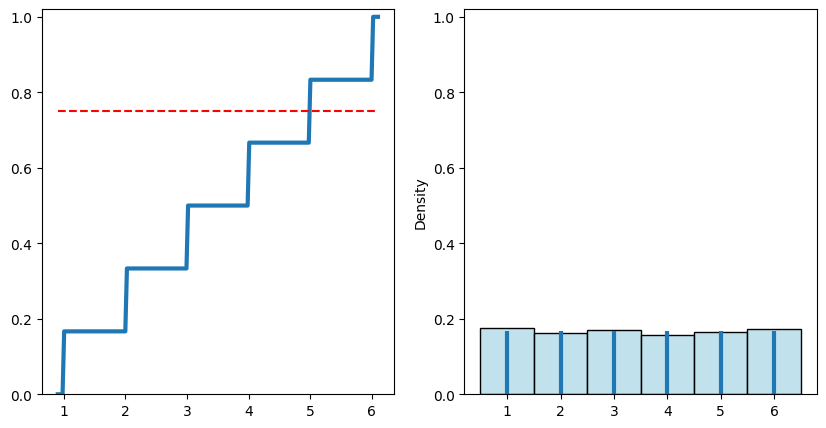

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import randint

#Zufallsvariable definieren
X = randint(low=1,high=7)

#Cumulative Distribution Function
x = np.linspace(0.9,6.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(1,7))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,0.9,6.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(0.5,7.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(1,7),0,X_pmf,lw=3)
plt.ylim(0,1.02)
plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Mit pmf:
X.pmf(3) + X.pmf(4)

In [ ]:
# Mit cdf:
X.cdf(4) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Definieren Sie eine Zufallsvariable $X$, die auf den Werten $2,3,4,5,6,7,8,9$ diskret uniform verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie die Wahrscheinlichkeit $P(3.5<X\leqslant 6)$.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Suchen Sie typische Beispiele für Zufallsvariablen, die diskret uniform verteilt sind.

Wahrschienlichkeits P(3.5 < X <=6)0.7777777777777778
Erwartungswert: 5.0
Standardabweichung: 2.581988897471611
70%-Quantil: 7.0


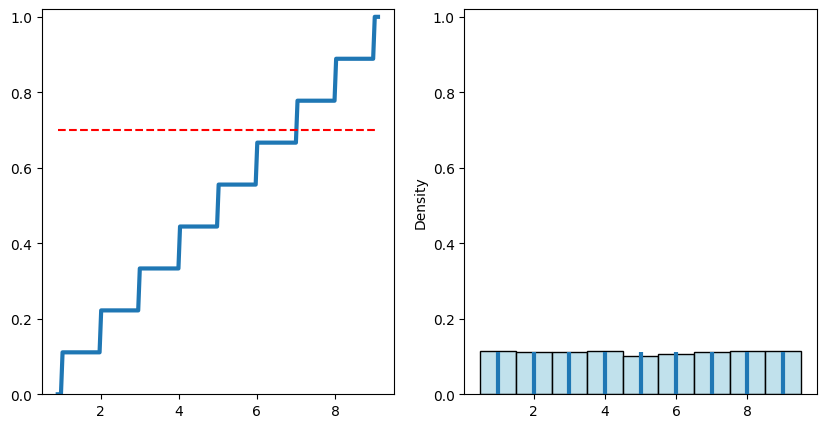

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import randint

#Zufallsvariable definieren
X = randint(low=1,high=10)

#Cumulative Distribution Function
x = np.linspace(0.9,9.1,200)
X_cdf = X.cdf(x) # P(3.5 < X < 6)

#Probability Mass Function
X_pmf = X.pmf(np.arange(1,10))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,0.9,9.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(0.5,10.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(1,10),0,X_pmf,lw=3)
plt.ylim(0,1.02)

print("Wahrschienlichkeits P(3.5 < X <=6)" + str(X.cdf(9) - X.cdf(2)))
print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
plt.show()

### <span style="color:rgb(160,0,86)">Die Bernoulli Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus der Menge $\{0,1\}$ hat eine **Bernoulli Verteilung** mit: $$P(X=1)=p \;\,\text{ und }\,\; P(X=0)=1-p$$
- Wenn eine *diskrete* Zufallsvariable $X$ **Bernoulli** verteilt ist, schreiben wir $$X\sim \mathsf{Ber}(p)\;.$$
- In **SciPy** heisst diese Zufallsvariable **bernoulli( )** und sie hat einen Parameter <tt>p</tt>.
- ***Zum Beispiel*** ein Wurf mit einer gefälschten Münze.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli

#Zufallsvariable definieren
X = bernoulli(p=0.8)

#Cumulative Distribution Function
x = np.linspace(-0.1,1.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.array([0,1]))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,1.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,2.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.array([0,1]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>
Definieren Sie eine Zufallsvariable $X$, die mit $p=0.3$ Bernoulli verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Berechnen Sie in Abhängigkeit von $p$ formal den Erwartungswert $\mu$, die Standardabweichung $\sigma$. 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Bernoulli verteilt sind.
 

Erwartungswert: 0.3
Standardabweichung: 0.458257569495584
70%-Quantil: 0.0
Abhängigkeit: 0.25099800796022265


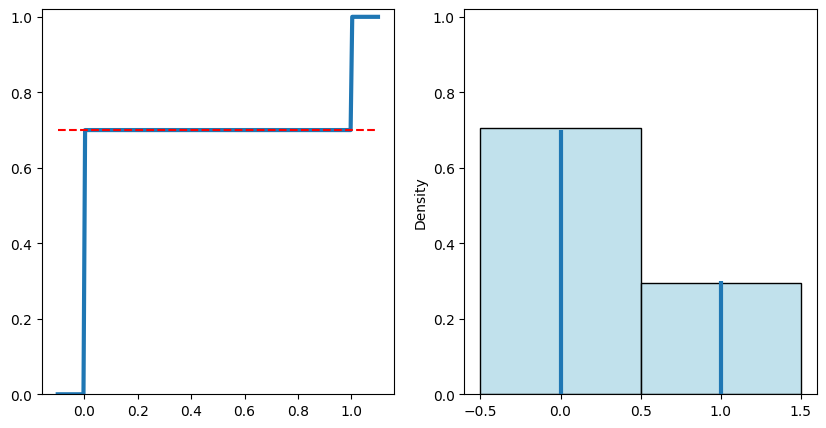

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import bernoulli

#Zufallsvariable definieren
X = bernoulli(p=0.3)

#Cumulative Distribution Function
x = np.linspace(-0.1,1.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.array([0,1]))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,1.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,2.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.array([0,1]),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Abhängigkeit: " + str(0.3* math.sqrt(1-0.3)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Binomial Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus der Menge $\{0,1,\ldots,n\}$ hat eine **Bernoulli Verteilung** mit: $$P(X=k)=\binom{n}{k}\cdot p^k\cdot(1-p)^{n-k}$$
- Wenn eine *diskrete* Zufallsvariable $X$ **Binomial** verteilt ist, schreiben wir $$X\sim \mathsf{Bin}(p,n)\;.$$
- In **SciPy** heisst diese Zufallsvariable **binom( )** und sie hat zwei Parameter <tt>n</tt> und <tt>p</tt>.
- ***Zum Beispiel*** die Anzahl Köpfe bei $n$ Würfen mit einer gefälschten Münze.

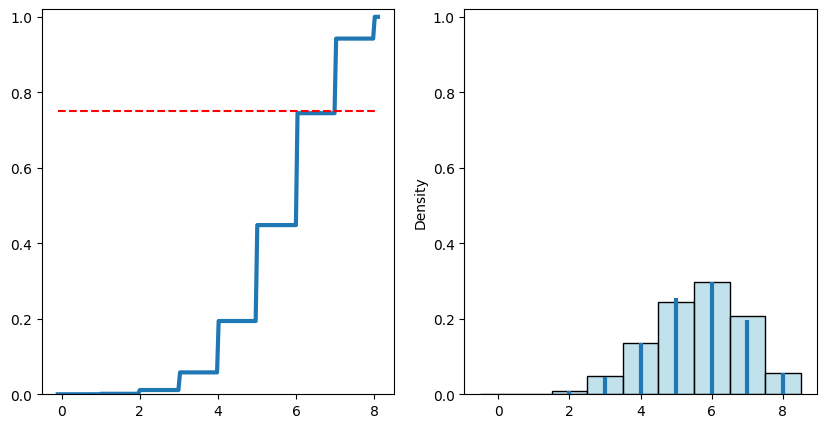

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom

#Zufallsvariable definieren
X = binom(p=0.7,n=8)

#Cumulative Distribution Function
x = np.linspace(-0.1,8.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,9))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,8.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(0,9),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Mit pmf:
X.pmf(3) + X.pmf(4) 

In [ ]:
# Mit cdf:
X.cdf(4) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 3</span>
Definieren Sie eine Zufallsvariable $X$, die mit $p=0.75$ und $n=12$ Binomial verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(3\leqslant X \leqslant 9)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Binomial verteilt sind.

Erwartungswert: 9.0
Standardabweichung: 1.5
70%-Quantil: 10.0


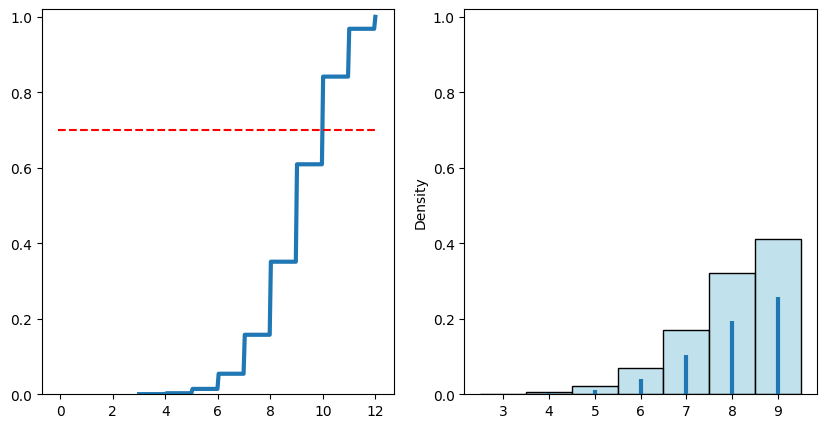

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom

#Zufallsvariable definieren
X = binom(p=0.75,n=12)

#Cumulative Distribution Function
x = np.linspace(3,12,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(3,10))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,12.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(2.5,9.6),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(3,10),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Geometrische Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus der Menge $\mathbb{N}_0=\{0,1,2,\ldots\}$ hat eine **Geometrische Verteilung** mit: $$P(X=k)=(1-p)^{k-1}\cdot p$$
- Wenn eine *diskrete* Zufallsvariable $X$ **Geometrisch** verteilt ist, schreiben wir $$X\sim \mathsf{Geo}(p)\;.$$
- In **SciPy** heisst diese Zufallsvariable **geom( )** und sie hat einen Parameter <tt>p</tt>.
- ***Zum Beispiel*** die Anzahl Würfe mit einer gefälschten Münze, bis zum ersten Mal Kopf erscheint.

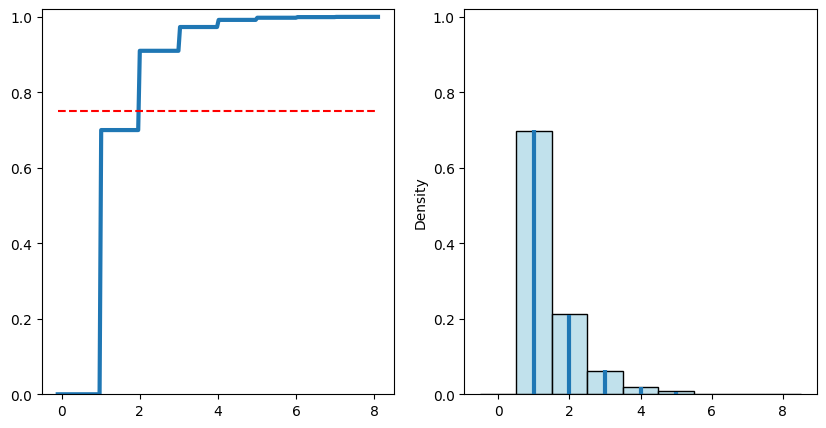

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import geom

#Zufallsvariable definieren
X = geom(p=0.7)

#Cumulative Distribution Function
x = np.linspace(-0.1,8.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,9))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,8.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(0,9),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:


In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Mit pmf:
X.pmf(3) + X.pmf(4)

In [ ]:
# Mit cdf:
X.cdf(4) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 4</span>
Definieren Sie eine Zufallsvariable $X$, die mit $p=0.4$ Geometrisch verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \geqslant 5)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Geometrisch verteilt sind.

Erwartungswert: 2.5
Standardabweichung: 1.9364916731037083
70%-Quantil: 3.0
Wahrscheinlichkeit P (X >= 5)?:0.12959999999999994


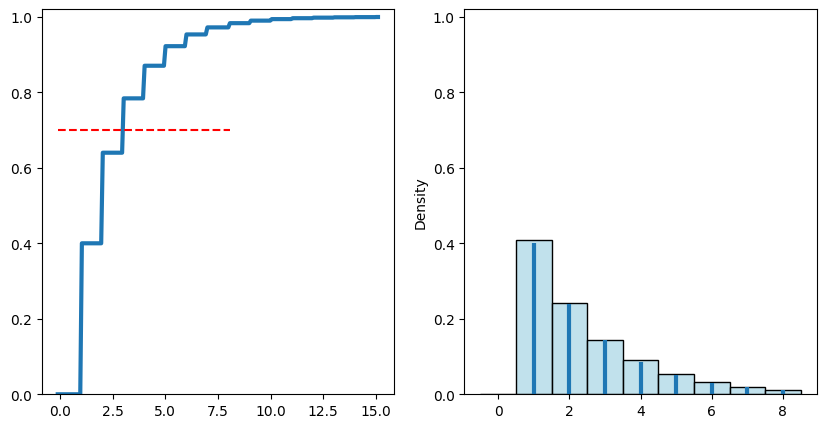

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import geom

#Zufallsvariable definieren
X = geom(p=0.4)

#Cumulative Distribution Function
x = np.linspace(-0.1,15.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,9))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,8.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(0,9),0,X_pmf,lw=3)
ax2 = plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P (X >= 5)?:" + str(1 - X.cdf(4)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Poisson Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus der Menge $\mathbb{N}_0=\{0,1,2,\ldots\}$ hat eine **Poisson Verteilung** mit: $$P(X=k)=e^{-\mu}\cdot\frac{\mu^k}{k!}$$
- Wenn eine *diskrete* Zufallsvariable $X$ **Poisson** verteilt ist, schreiben wir $$X\sim \mathsf{Poi}(\mu)\;.$$
- In **SciPy** heisst diese Zufallsvariable **poisson( )** und sie hat einen Parameter <tt>$\mu$</tt>.
- ***Zum Beispiel*** die Anzahl Anrufe pro Stunde in einem Call-Center.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

#Zufallsvariable definieren
X = poisson(mu=2)

#Cumulative Distribution Function
x = np.linspace(-0.1,8.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,9))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,8.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,9.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(0,9),0,X_pmf,lw=3)
plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:


In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean() # ist gleich dem Parameter mu

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var() # ist gleich dem Parameter mu

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Mit pmf:
X.pmf(3) + X.pmf(4)

In [ ]:
# Mit cdf:
X.cdf(4) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 5</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\mu=4.25$ Poisson verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \geqslant 5)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Poisson verteilt sind.

Erwartungswert: 4.25
Standardabweichung: 2.0615528128088303
70%-Quantil: 5.0
Wahrscheinlichkeit P (X >= 5)?:0.419881686272238


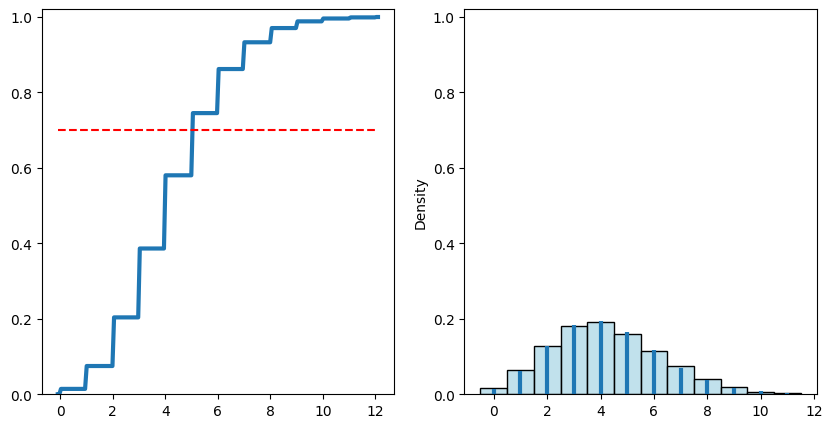

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

#Zufallsvariable definieren
X = poisson(mu=4.25)

#Cumulative Distribution Function
x = np.linspace(-0.1,12.1,200)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,12))

#5000 zufällige Werte ziehen:
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,12.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,12.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.arange(0,12),0,X_pmf,lw=3)
plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P (X >= 5)?:" + str(1 - X.cdf(4)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Hypergeometrische Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit zulässigen Werten aus der Menge $\mathbb{N}_0=\{0,1,2,\ldots\}$ hat eine **Hypergeometrische Verteilung** mit: $$P(X=k)=\frac{\binom{n}{k}\cdot\binom{M-n}{N-k}}{\binom{M}{N}}$$
- Wenn eine *diskrete* Zufallsvariable $X$ **Hypergeometrisch** verteilt ist, schreiben wir $$X\sim \mathsf{HypG}(M,n,N)\;.$$
- In **SciPy** heisst diese Zufallsvariable **hypergeom( )** und sie hat drei Parameter <tt>M</tt>, <tt>n</tt> und <tt>N</tt>.
- ***Zum Beispiel*** die Anzahl weisse Kugeln in einer Auswahl von $N$ Kugeln. Diese $N$ Kugeln werden aus einer Urne mit insgesamt $M$ Kugeln gezogen, von denen total $n$ weiss sind.

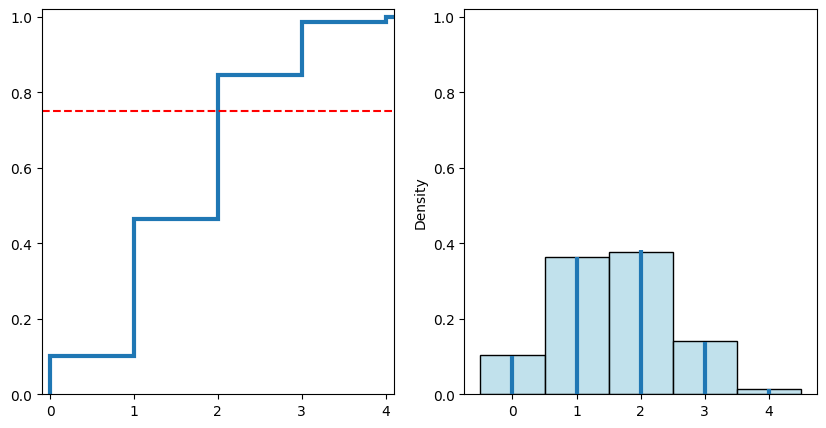

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import hypergeom

#Zufallsvariable definieren
# 20 Kugeln, davon 4 weiss und 16 schwarz, 8 Kugeln werden zufällig gezogen
X = hypergeom(M=20,n=4,N=8) 

#Cumulative Distribution Function
x = np.arange(0,5)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,5))

# 5000 zufällige Werte ziehen
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.stairs(X_cdf,orientation="vertical",lw=3)
plt.ylim(0,1.02)
plt.xlim(-0.1,4.1)
ax1.hlines(0.75,-0.1,4.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,5.5),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.array([0,1,2,3,4]),0,X_pmf,lw=3)
plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Mit pmf:
X.pmf(3) + X.pmf(4)

In [ ]:
# Mit cdf:
X.cdf(4) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 6</span>
Definieren Sie eine Zufallsvariable $X$, die mit $M=50$, $n=6$, $N=30$ Hypergeometrisch verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 2)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die Hypergeometrisch verteilt sind.

Erwartungswert: 3.6
Standardabweichung: 1.1371284995504227
70%-Quantil: 4.0
Wahrscheinlichkeit P (X >= 5)?:0.16433857539315452


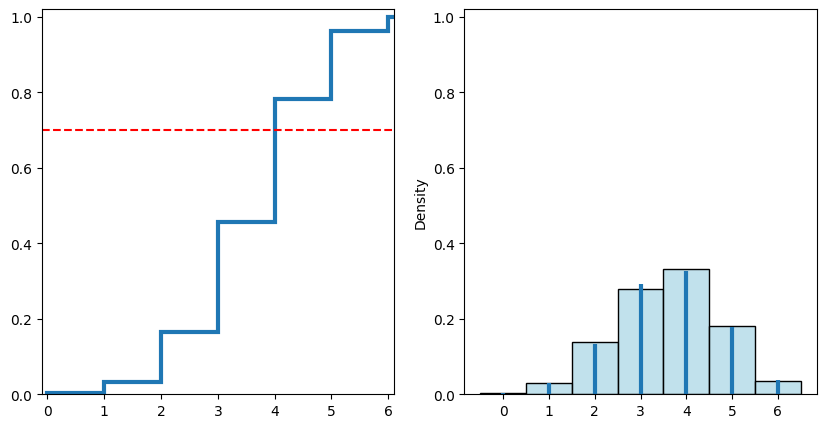

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import hypergeom

#Zufallsvariable definieren
# 20 Kugeln, davon 4 weiss und 16 schwarz, 8 Kugeln werden zufällig gezogen
X = hypergeom(M=50,n=6,N=30) 

#Cumulative Distribution Function
x = np.arange(0,7)
X_cdf = X.cdf(x)

#Probability Mass Function
X_pmf = X.pmf(np.arange(0,7))

# 5000 zufällige Werte ziehen
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.stairs(X_cdf,orientation="vertical",lw=3)
plt.ylim(0,1.02)
plt.xlim(-0.1,6.1)
ax1.hlines(0.7,-0.1,6.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,bins=np.arange(-0.5,7),stat="density",color="lightblue",ax=ax2)
ax2.vlines(np.array([0,1,2,3,4,5,6]),0,X_pmf,lw=3)
plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P (X <= 5)?:" + str(X.cdf(2)))

plt.show()

### <span style="color:rgb(160,0,86)">Die stetige uniforme Verteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus dem Intervall $[\texttt{loc},\texttt{loc}+\texttt{scale}]$ hat eine **stetige uniforme Verteilung** mit: $$P(X\leqslant x)=\int\limits_{\texttt{loc}}^{x}\frac{1}{\texttt{scale}}\,dt$$
- Wenn ein Zufallsvariable $X$ **stetig uniform** verteilt ist, schreiben wir $$X\sim \mathsf{Uni}(\text{loc},\text{scale})\;.$$
- In **SciPy** heisst diese Zufallsvariable **uniform( )** und sie hat zwei Parameter <tt>loc</tt> und <tt>scale</tt>.
- ***Zum Beispiel*** zufällig eine reelle Zahl zwischen Null und Eins wählen.


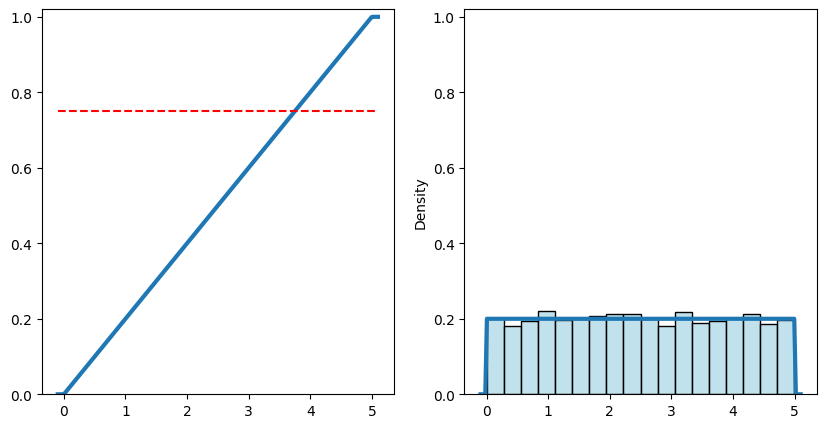

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import uniform

#Zufallsvariable definieren
X = uniform(loc=0,scale=5)

#Cumulative Distribution Function
x = np.linspace(-0.1,5.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte (statt pmf bei diskreten Zufallsvariablen)
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,5.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [23]:
X.ppf(0.75)

np.float64(3.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:


In [24]:
X.mean()

np.float64(2.5)

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:


In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:


In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Nur mit cdf:
X.cdf(5) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 7</span>
Definieren Sie eine Zufallsvariable $X$, die auf dem Intervall $[3,7]$ stetig uniform verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 4.33)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: 6.5
Standardabweichung: 2.0207259421636903
70%-Quantil: 7.8999999999999995
Wahrscheinlichkeit P (X >= 5)?:0.19


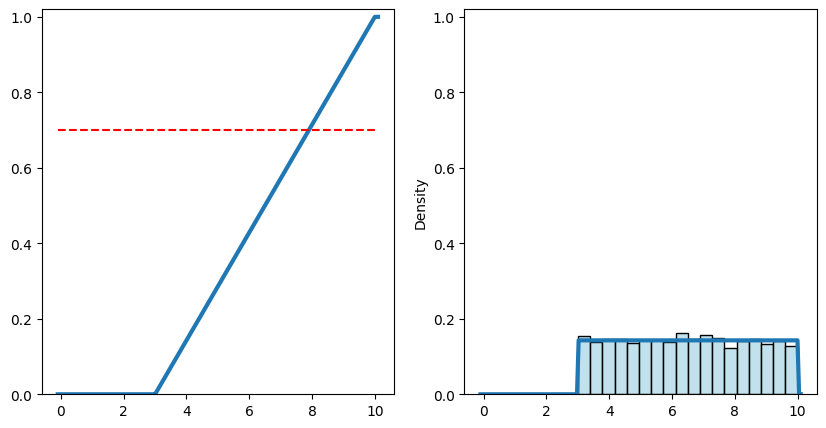

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import uniform

#Zufallsvariable definieren
X = uniform(loc=3,scale=7)

#Cumulative Distribution Function
x = np.linspace(-0.1,10.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte (statt pmf bei diskreten Zufallsvariablen)
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,10.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P (X <= 4.33)?:" + str(X.cdf(4.33)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Exponentialverteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus dem Intervall $[\texttt{loc},\infty)$ hat eine **Exponentialverteilung** mit: $$P(X\leqslant x)=\int\limits_{\texttt{loc}}^{x}\frac{1}{\texttt{scale}}\cdot e^{-\frac{t-\texttt{loc}}{\texttt{scale}}}\,dt$$
- Wenn ein *stetige* Zufallsvariable $X$ **Expenential** verteilt ist, schreiben wir $$X\sim \mathsf{Exp}(\text{loc},\text{scale})\;.$$
- In **SciPy** heisst diese Zufallsvariable **expon( )** und sie hat zwei Parameter <tt>loc</tt> und <tt>scale</tt>.
- ***Zum Beispiel*** die Lebensdauer einer Glühbirne

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import expon

#Zufallsvariable definieren
X = expon(loc=1,scale=2)

#Cumulative Distribution Function
x = np.linspace(-0.1,15.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-0.1,15.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:


In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Nur mit cdf:
X.cdf(5)- X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 8</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\text{loc}=2$ und $\text{scale}=5$ Exponential verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(X \leqslant 6)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: 7.0
Standardabweichung: 5.0
70%-Quantil: 8.01986402162968
Wahrscheinlichkeit P (X <= 6)?:0.5506710358827784


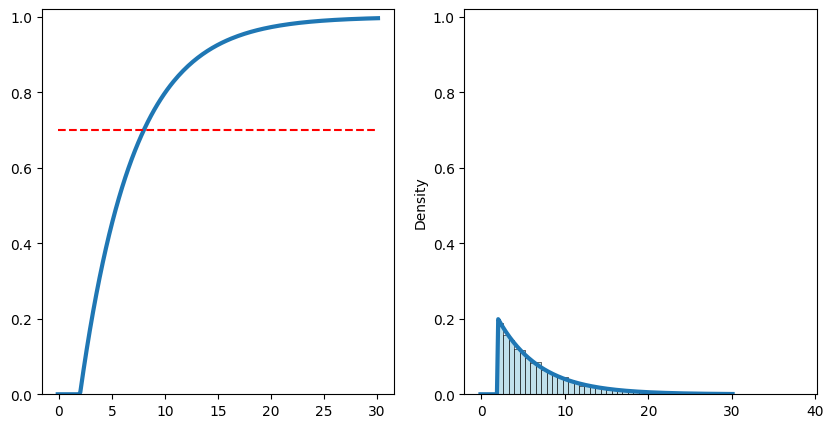

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import expon

#Zufallsvariable definieren
X = expon(loc=2,scale=5)

#Cumulative Distribution Function
x = np.linspace(-0.1,30.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-0.1,30.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P (X <= 6)?:" + str(X.cdf(6)))

plt.show()

### <span style="color:rgb(160,0,86)">Die Normalverteilung</span>

- Eine Zufallsvariable $\,\pmb{X}\,$ mit Werten aus $\mathbb{R}$ hat eine **Normalverteilung** mit: $$P(X\leqslant x)=\int\limits_{-\infty}^{x}\frac{1}{\texttt{scale}\cdot\sqrt{2\pi}}\cdot e^{-\frac{(t-\texttt{loc})^2}{2\,\cdot\,\texttt{scale}^2}}\,dt$$
- Wenn ein *stetige* Zufallsvariable $X$ **normal** verteilt ist, schreiben wir $$X\sim \mathsf{Norm}(\text{loc},\text{scale})\;.$$
- In **SciPy** heisst diese Zufallsvariable **norm( )** und sie hat zwei Parameter <tt>loc</tt> und <tt>scale</tt>.
- ***Zum Beispiel*** die Körpergrösse von Menschen.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

#Zufallsvariable definieren
X = norm(loc=3,scale=1.5)

#Cumulative Distribution Function
x = np.linspace(-3.1,12.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.75,-3.1,12.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

plt.show()

Das **0.75-Quantil** $\,\pmb{x_{0.75}}\,$ ist:

In [ ]:
X.ppf(0.75)

Der **Erwartungswert** $\,\pmb{\mu}\,$ ist:

In [ ]:
X.mean()

Die **Varianz** $\,\pmb{\sigma^2}\,$ ist:

In [ ]:
X.var()

Die **Standardabweichung** $\,\pmb{\sigma}\,$ ist:

In [ ]:
X.std()

Die **Wahrscheinlichkeit** $\,\pmb{P(2<X<5)}\,$ ist:

In [ ]:
# Nur mit cdf:
X.cdf(5) - X.cdf(2)

### <span style="color:rgb(160,0,86)">Aufgabe 9</span>
Definieren Sie eine Zufallsvariable $X$, die mit $\text{loc}=-3$ und $\text{scale}=3.5$ Normal verteilt ist.
- Zeichen Sie die Wahrscheinlichkeitsverteiung und die kumulative Wahrscheinlichkeitsverteilung.
- Sie verändern die Parameter $\text{loc}$ und $\text{scale}$ die Wahrscheinlichkeitsverteilung? 
- Bestimmen Sie den Erwartungswert $\mu$, die Standardabweichung $\sigma$ und das 70\%-Quantil.
- Wie gross ist die Wahrscheinlichkeit $P(-4\leqslant X \leqslant -1)$? 
- Suchen Sie typische Beispiele für Zufallsvariablen, die stetig uniform verteilt sind.

Erwartungswert: -3.0
Standardabweichung: 3.5
70%-Quantil: -1.1645982055218576
Wahrscheinlichkeit P(-4 <= X <= -1)?:0.3285969358033314


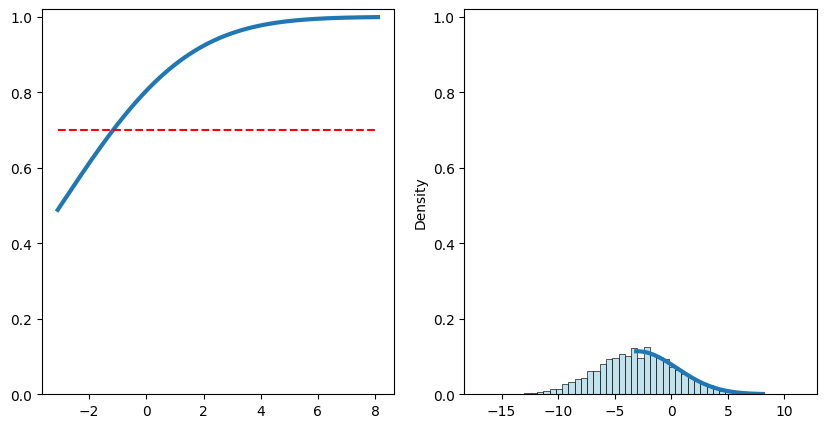

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

#Zufallsvariable definieren
X = norm(loc=-3,scale=3.5)

#Cumulative Distribution Function
x = np.linspace(-3.1,8.1,200)
X_cdf = X.cdf(x)

#Probability Density Function
X_pdf = X.pdf(x)

#5000 zufällige Werte
sample = X.rvs(size=5000)

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,X_cdf,lw=3)
plt.ylim(0,1.02)
ax1.hlines(0.7,-3.1,8.1,color="red",linestyle="dashed")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(sample,stat="density",color="lightblue",ax=ax2)
ax2.plot(x,X_pdf,lw=3)
plt.ylim(0,1.02)

print("Erwartungswert: " + str(X.mean()))
print("Standardabweichung: "+ str(X.std()))
print("70%-Quantil: " + str(X.ppf(0.70)))
print("Wahrscheinlichkeit P(-4 <= X <= -1)?:" + str(X.cdf(-1) - X.cdf(-4)))

plt.show()

![HSLU](Bilder/LogoHSLU.png)